<center>
<img src="https://raw.githubusercontent.com/FUlyankin/r_probability/master/end_seminars/sem_5/pEbNtDxzx0Q.jpg" height="500" width="500"> 


# R для тервера и матстата

## 4.3 Доверительные интервалы


Данный ноутбук является домашкой по курсу «R для теории вероятностей и математической статистики» (РАНХиГС, 2019). Автор ноутбука [вот этот парень по имени Филипп.](https://vk.com/ppilif) Если у вас для него есть деньги, слава или женщины, он от этого всего не откажется. Ноутбук распространяется на условиях лицензии [Creative Commons Attribution-Share Alike 4.0.](https://creativecommons.org/licenses/by-sa/4.0/) При использовании обязательно упоминание автора курса и аффилиации. При наличии технической возможности необходимо также указать активную гиперссылку на [страницу курса.](https://fulyankin.github.io/R_probability/) На ней можно найти другие материалы. Фрагменты кода, включенные в этот notebook, публикуются как [общественное достояние.](https://creativecommons.org/publicdomain/zero/1.0/)

------------------------

Мы поговорили про генерации, сходимости, да и вообще в принципе про случайные величины, которые обитают внутри сундука. Вы же ещё помните про тот магический сундук, который выплёвывает на нас выборки? Теперь пришло время поговорить о том как работать с испражнениями этого сундука. В этой тетрадке мы поговорим: 

* 

В этой тетрадке мы обсудим почему среднее это очень круто. Мы сделаем переход от точечных оценок к интервальным и попытаемся разобраться как строятся доверительные интервалы, а также обсудим __дельта-метод.__ Итак, план: 

1. Мощь средних, асимптотические доверительные интервалы 
2. Дельта-метод 
3. Всё и сразу в задачке про Свету
4. Точные доверительные интервалы

## 2. Дельта-метод

Очень часто оценки, которые мы получаем выражаются через средние. Например, типичная оценка, полученая методом моментов может выглядеть как-нибудь так: 

$$
\hat \theta = \frac{\overline{x^2} - \bar x}{\overline{ \ln x}}. 
$$

Было бы круто построить для таких оценок доверительные интервалы. Для этого нужно знать распределение $\hat \theta$.  Дельта-метод позволяет его получить. Сам по себе он является обобщением центральной предельной теоремы. 

__Теорема (дельта-метод):__ 

Если $X_1, \ldots, X_n$ независимые одинаково распределённые случайные величины с математическим ожиданием $\mu$ и дисперсией $\sigma^2$, а $g(t)$ диференцируемая на множестве действительных чисел функция, тогда случайная величина $g(\bar X)$ будет иметь асимптотически нормальное распределение с математическим ожиданием $g(\mu)$ и дисперсией $\frac{\sigma^2}{n} \cdot (g'(\mu))^2$. То есть

$$
g(\bar X) \sim N( g(\mu), \frac{\sigma^2}{n} \cdot (g'(\mu))^2).
$$

На паре мы попробовали воспользоваться дельта-методом для пары ситуаций. Например, мы выяслинили, что если случайные величины $X_1, \ldots, X_n$ взяты из распределения равномерного на отрезке $[2; 8]$, тогда:

$$ \sin(\pi \cdot \bar x) \sim N(0, \frac{3}{n} \cdot \pi^2)$$

Давайте попробуем убидиться в этом на симуляциях. 

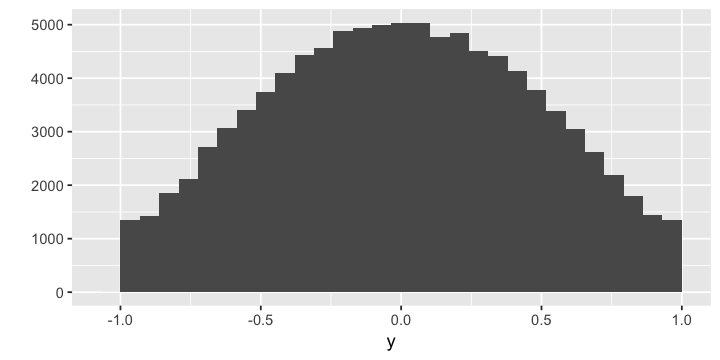

In [21]:
n_obs = 10^5       # симуляция может быть много!
y = rep(0,n_obs)
for(i in 1:n_obs){
    y[i] = sin(pi*mean(runif(100, 2, 8))) # но среднее по выборке 100! 
}

# Получается милый купол 
# Понимаете ли вы, почему он не выходит за отрезок 0,1
# Понимаете ли вы, почему мы говорим при этом про нормальное распределение?! 

# Правильно! Все теоремы выше являются асимптотическими, то есть распределение Y
# хорошо приближается нормальным при большом n, но нормальным оно не является. 
# Оно становится им только при бесконечном n.

qplot(y, bins=30)

In [22]:
mean(y) # близко к нулю 

[1] -0.001077973

In [23]:
0.03*pi^2
var(y) # близко к тому, что написано выше)

[1] 0.2960881

[1] 0.2234995

Теперь давайте немного пофантазируем и представим себе параметр $\lambda^2$. Логично взять в качестве оценки для него $\bar x^2$. Давайте воспользуемся дельта-методом и построим для такой оценки асимптотический доверительный интервал. 

$$
\begin{aligned}
E(X) &= Var(X) = \lambda \\ 
g(t) &= t^2 \\ 
g'(t) &= 2t \\
\end{aligned}
$$

В итоге получаем, что $$\bar x^2 \sim N \left(\lambda^2, \frac{\lambda}{n} \cdot 4 \lambda^2  \right).$$ Исходя отсюда строим доверительный интервал:

$$
\bar x^2 \pm  z_{1-\frac{\alpha}{2}} \cdot \sqrt{\frac{4 \bar x^3}{n}}
$$

In [56]:
mean(x)^2 - z_alpha*sqrt(4*mean(x)^3/length(x))
mean(x)^2 + z_alpha*sqrt(4*mean(x)^3/length(x))

[1] 15.62079

[1] 16.37921

Вот такие вот пироги! Надеюсь, что вы что-то почувствовали, решая эту задачку и у вас в голове выработалось понимание, что в матстате нет отдельных сюжетов и всё довольно сильно переплетено. Дальше мы попытаемся развить эту интуицию.

# 4. Точные доверительные интервалы

В общем случае $\bar x$ имеет асимптотически нормальное распределение. Когда $X \sim N(\mu, \sigma^2)$, статистика $\bar x$ имеет в точности нормальное распределение. Это означает, что для данного узкого случая мы можем построить точные доверительные интервалы. 

## 4.1 Доверительный интервал для математического ожидания нормального распределения 

Пусть процесс порождения данных даровал нам случайную величину из нормального распределения, $X \sim N(\mu, \sigma^2)$. Сгенерируем для неё генеральную совокупность! 

In [108]:
set.seed(42)
x_general = rnorm(10^5, mean = 4, sd = 50)

Мы пронаблюдали какую-то выборку, при этом о задумке природы относительно генеральной совокупности ничего не зная.

In [109]:
set.seed(42)
x_sample = sample(x = x_general, size = 100)

По этой выборке мы оценили параметр $\mu$. Как мы помним, хорошей оценкой для него является среднее. 

In [110]:
mu_hat = mean(x_sample)
mu_hat

[1] 6.249378

При этом истиное значение мю было равно

In [111]:
mean(x_general)

[1] 3.793691

Мы знаем, что 

$$
\bar x \sim N(\mu, \frac{\sigma^2}{n}).
$$

Причём это распределение получено не на основе ЦПТ. Оно является точным. 

$$
\bar x = \frac{x_1 + \ldots + x_n}{n}
$$

Случайные величины $x_1, \ldots, x_n$ имеют нормальное распределение. Как мы помним из свойств нормального распределения, сумма нормальных распределений распределена нормально. То, что среднее будет распределено именно с такими параметрами, вы должны получить сами. Если вы не можете сделать это, пишите мне в л.c. У вас большие проблемы. Зная, что среднее иммеет нормальное распрделение, рассуждая по аналогии с долей любителей кофе, получаем доверительный интервал для $\mu$:

$$
\bar{x} - z_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}} \le \mu \le \bar{x} + z_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}
$$


В этой формуле есть один неизвестный нам элемент, $\sigma$. Допустим, нам откуда-то известно, что дисперсия $\sigma^2=50^2$. Построим доверительные интервал для этого случая.

In [112]:
mu_hat  = mean(x_sample)
mu_left = mu_hat - qnorm(1-0.05/2)*50/sqrt(100)
mu_right= mu_hat + qnorm(1-0.05/2)*50/sqrt(100)
cat('Параметр mu с вероятностью 95% лежит между',mu_left, 'и',mu_right, '\n')
cat('Длина интервала:', mu_right-mu_left)

Параметр mu с вероятностью 95% лежит между -3.550442 и 16.0492 
Длина интервала: 19.59964

В чём минус этого интервала? Дисперсия взята с потолка. Случаи, когда она известна, очень редки. Пример случая, когда можно использовать такой интервал, - оценка работы некоторого прибора. В таких ситуациях известна его погрешность, а значит, и дисперсия. 

В случаях, когда она неизвестна, её нужно оценить по выборке. Тогда мы можем сказать, что выборочное среднее будет иметь распределение:

$$
\bar x \sim N(\mu, \frac{s^2}{n}).
$$

Это распределение уже будет асимптотическим, потому что мы считали оценку дисперсии по выборке. Посмотрим каким окажется доверительный интервал: 

In [113]:
mu_hat  = mean(x_sample)
mu_left = mu_hat - qnorm(1-0.05/2)*sd(x_sample)/sqrt(100)
mu_right= mu_hat + qnorm(1-0.05/2)*sd(x_sample)/sqrt(100)
cat('Параметр mu с вероятностью 95% лежит между',mu_left, 'и',mu_right, '\n')
cat('Длина интервала:', mu_right-mu_left)

Параметр mu с вероятностью 95% лежит между -2.967016 и 15.46577 
Длина интервала: 18.43279

В чём минус такого интервала? Он асимптотический. А можно было бы построить точный. Можно показать, что случайная величина $\sqrt{n} \cdot \frac{\bar x - \mu}{s}$ имеет распределение стьюдента с $n-1$ степенью свободы. 

Что делать, если дисперсия неизвестна? Оценить её по выборке! Тогда у нас будет уже целых два распределения: для среднего и для выборочной дисперсии. Со средним всё просто: 

$$
\hat \mu \sim N\left(\mu, \frac{\sigma^2}{n}  \right)
$$

С дисперсией чуток сложнее. По Тореме Фишера, если генеральная совокупность имеет нормальное распределение, то статистика $\frac{n s^2}{\sigma^2} \sim \chi^2_{n-1}$. Не помните такого факта? Марш в лекции! Найдите его и внимательно изучите!

Владея этим фактом, мы можем сделать для статистики для проверки гипотезы небольшой финт: 

$$
\frac{\bar x - \mu}{\frac{s}{\sqrt{n}}} = \frac{\bar x - \mu}{\frac{\sigma}{\sqrt{n}}} : \sqrt{\frac{1}{n-1} \frac{(n-1) s^2}{\sigma^2}} \sim \frac{N(0,1)}{\sqrt{\frac{\chi^2_{n-1}}{n-1}}} = t_{n-1} 
$$

Подытожим. Если дисперсия неизвестна и её надо оценить, то

$$
\frac{\bar x - \mu}{\frac{s}{\sqrt{n}}} \sim t(n-1).
$$

Обратите внимание, что это распределение точное. Также обратите внимание, что при $n \to \infty$ распределение Стьюдента сходится к нормальному. Значит наша статистика будет иметь асимптотически нормальное распределение и при больших $n$ можно смело использовать его. Погрешность при его использовании будет небольшой. Но ежели нужен точный результат, а не асимптотический, используйте распределение Стьюдента. Зная точное распределение, мы можем построить для математического ожидания точный доверительный интервал: 

$$
\bar{x} \pm t_{1-\frac{\alpha}{2}} \frac{s}{\sqrt{n}}
$$


In [ ]:
mu_hat  = mean(x_sample)
mu_left = mu_hat - qt(1-0.05/2, df=99)*sd(x_sample)/sqrt(100)
mu_right= mu_hat + qt(1-0.05/2, df=99)*sd(x_sample)/sqrt(100)
cat('Параметр mu с вероятностью 95% лежит между',mu_left, 'и',mu_right, '\n')
cat('Длина интервала:', mu_right-mu_left)

Обратите внимание, что на тех же самых наблюдениях, доверительный интервал, основанный на $t$-статистике, обладает немного большей длиной. Как считаете с чем это связано? 

Конечно же с тем, что он точный! Хвосты распределения Стьюдента толще хвостов нормального распределения. Из-за этого, ширина интервала больше. Точный интервал гарантированно накрывает истиное значение параметра в $95\%$ случаев. Асимптотический интервал делает это только при бесконечно большом $n$. 

В R есть встроенная команда `t.test`, позволяющая строить доверительные интервалы для средних, а также проверять для них гипотезы. Сейчас нас интересует из этой команды только строчка с $95\%$ доверительным интервалом. Он совпадает с тем, что мы посчитале выше вручную. 

In [114]:
tt <- t.test(x_sample)
tt


	One Sample t-test

data:  x_sample
t = 1.329, df = 99, p-value = 0.1869
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -3.081062 15.579818
sample estimates:
mean of x 
 6.249378 


In [115]:
tt$conf.int

[1] -3.081062 15.579818
attr(,"conf.level")
[1] 0.95

## 4.2 Доверительный интервал для дисперсии нормального распределения 

По аналогии мы можем построить точные доверительные интервалы для дисперсии. Как для случая, когда мы знаем математическое ожидание, так и для случая когда мы его не знаем. Оба доверительных интервала будут точными. 

Делай раз! Пусть $ X \sim N(\mu, \sigma^2)$ и мы знаем, что $\mu = 4.$  В таком случае 

$$s^2 = \frac{1}{n} \sum_{i=1}^n (X_i - 4)^2.$$

Каждая случайная величина $X_i - 4$ будет иметь нормальное распределение с нулевым математическим ожиданием и дисперсией $\sigma^2$. Хотелось бы, чтобы эта величина имела распределение $N(0,1)$, тогда бы в нашем распоряжении оказалась бы сумма квадратов $n$ стандартных случайных величин, которая распределена как $\chi^2_n$. Тогда бы мы смогли построить доверительный интервал для $\sigma^2$, отталкиваясь от этого распределения. Поделим штуку в скобках на сигму. Тогда придётся поделить $s^2$ на $\sigma^2$

$$\frac{s^2}{\sigma^2} = \frac{1}{n} \sum_{i=1}^n \left(\frac{X_i - 4}{\sigma}\right)^2.$$

Почти готово. Осталось избавиться от буквы $n$. Для этого домножаем обе части на неё и получаем справа случайную величину, имеющую "хи-квадрат" распределение

$$\frac{n s^2}{\sigma^2} =\sum_{i=1}^n \left(\frac{X_i - 4}{\sigma}\right)^2 \sim \chi^2_n.$$

С вероятностью $95\%$ будет выполнено неравенство

$$
\chi^2_n (\frac{\alpha}{2}) \le \frac{n s^2}{\sigma^2} \le \chi^2_n (1-\frac{\alpha}{2}).
$$

Разворачиваем его относительно нашего параметра $\sigma^2$

$$
\frac{n s^2}{\chi^2_n (1 - \frac{\alpha}{2})}
\le \sigma^2 \le \frac{n s^2}{\chi^2_n (\frac{\alpha}{2})}.
$$

Готово! Это распределение точное. В случае, если математическое ожидание неизвестно, у нас начинаются проблемы. Оценка дисперсии будет завязана на среднем

$$s^2 = \frac{1}{n-1} \sum_{i=1}^n (X_i - \bar x)^2.$$

Случайная величина $X_i - \bar x$ не будет нормально распределена почти наверное (подумайте почему почти наверное). К счастью, возникшие проблемы решает теорема Фишера, которая говорит, что 

$$
\frac{(n-1) s^2}{\sigma^2}  \sim \chi^2_{n-1}.
$$

В случае, когда среднее неизвестно мы снова получаем распределение хи-квадрат, но уже с $n-1$ степенью свободы. Интуитивно можно сказать, что это происходит из-за того, что мы сковываем нашу выборку двумя уравнениями: на среднее и на выборочную дисперсию. Из-за этого между двумя наблюдениями из выборки возникает линейная зависимомть и мы можем свободно варьеровать в ней только $n-1$ случайную величину. Полученное в итоге распределение тоже будет точным.

In [116]:
x_sample = sample(x = x_general, size = 1000)
var(x_sample)

[1] 2396.564

In [117]:
# Если знаем математическое ожидание!
n = length(x_sample)
s = sqrt(1/n*sum((x_sample - 4)^2))

sigma_left  = n*s^2/(qchisq(1 - 0.05/2,df=n))
sigma_right = n*s^2/(qchisq(0.05/2,df=n))

cat('Параметр mu с вероятностью 95% лежит между',sigma_left, 'и', sigma_right, '\n')
cat('Длина интервала:', sigma_right - sigma_left)

Параметр mu с вероятностью 95% лежит между 2197.559 и 2618.857 
Длина интервала: 421.2977

In [118]:
# Если не знаем математического ожидания!
n = length(x_sample)
s = sd(x_sample)

sigma_left  = (n-1)*s^2/(qchisq(1 - 0.05/2,df=n-1))
sigma_right = (n-1)*s^2/(qchisq(0.05/2,df=n-1))

cat('Параметр mu с вероятностью 95% лежит между',sigma_left, 'и', sigma_right, '\n')
cat('Длина интервала:', sigma_right - sigma_left)

Параметр mu с вероятностью 95% лежит между 2199.537 и 2621.444 
Длина интервала: 421.9072

## 4.3 Общая схема строительства точных доверительных интервалов

На самом деле можно постараться построить точный доверительный интервал и для других распределений. Например, в [учебнике Черновой](http://old.nsu.ru/mmf/tvims/chernova/tv/lec/node53.html) на страницах $60-61$ это делается для равномерного распределения. Если интересно, немпременно загляните туда. 